#### Simple Linear Regression Intuition

In [1]:
# y = b + b1x1; trend line that best fits the data
# y = DV (vertical axis), 
# x = IV (horivontal axis), 
# b = y intercept(constant), 
# b1 = slope of the line = (y2-y1)/(x2-x2)

# Salary = 30,000 + b1* Experience
# Ordinary least squares
# draws a lot of trend lines and takes
# the line with the minimum sum of square(actual y - predicted y) 

# sum(actual(y) - predicted(y))^2 => minimum

### Importing the dataset

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Split X and y variables

In [16]:
# Importing the dataset
dataset = pd.read_csv('Salary_Data.csv')
dataset.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

### Visualising the dataset results

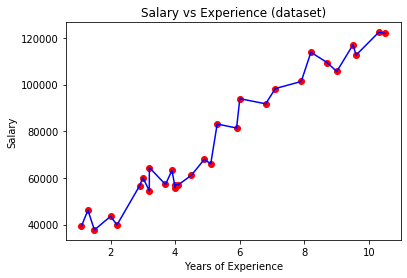

In [23]:
plt.scatter(X, y, color = 'red')
plt.plot(X, y, color = 'blue') 
plt.title('Salary vs Experience (dataset)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

### Splitting the dataset into the Training set and Test set

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [8]:
X_train[:5]

array([[9.6],
       [4. ],
       [5.3],
       [7.9],
       [2.9]])

In [9]:
X_test[:5]

array([[ 1.5],
       [10.3],
       [ 4.1],
       [ 3.9],
       [ 9.5]])

In [10]:
y_train[:5]

array([112635.,  55794.,  83088., 101302.,  56642.])

In [17]:
y_test

array([ 37731., 122391.,  57081.,  63218., 116969., 109431.])

### Training simple Linear Regression Model on the Training Set

In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Predicting the Test set results

In [18]:
y_pred = regressor.predict(X_test)

### Visualising the Training set results

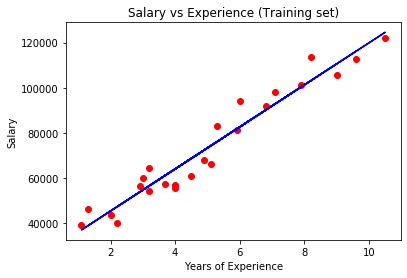

In [19]:
plt.scatter(X_train, y_train, color = 'red')
# regressor.predict(X_train) predicted y for X_train
plt.plot(X_train, regressor.predict(X_train), color = 'blue') 
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

### Visualising the Test set results

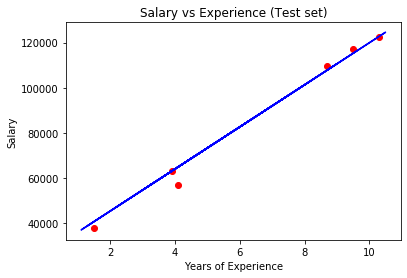

In [20]:
plt.scatter(X_test, y_test, color = 'red')
# regressor.predict(X_train) predicted y for X_train
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

### Making a single prediction (for example the salary of an employee with 12 years of experience)

In [24]:
print(regressor.predict([[12]]))

[138531.00067138]


Therefore, our model predicts that the salary of an employee with 12 years of experience is $ 138967,5.

**Important note:** Notice that the value of the feature (12 years) was input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting 12 into a double pair of square brackets makes the input exactly a 2D array. Simply put:

$12 \rightarrow \textrm{scalar}$

$[12] \rightarrow \textrm{1D array}$

$[[12]] \rightarrow \textrm{2D array}$

In [26]:
print(regressor.coef_)
print(regressor.intercept_)

[9312.57512673]
26780.099150628186


Therefore, the equation of our simple linear regression model is:

$$\textrm{Salary} = 9345.94 \times \textrm{YearsExperience} + 26816.19$$

**Important Note:** To get these coefficients we called the "coef_" and "intercept_" attributes from our regressor object. Attributes in Python are different than methods and usually return a simple value or an array of values.